<a href="https://colab.research.google.com/github/Erickrus/leetcode/blob/master/NasdaqDataLink.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip3 install nasdaq-data-link

In [24]:
import pandas as pd
import nasdaqdatalink
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
data = nasdaqdatalink.get("ECONOMIST/BIGMAC_USA", authtoken="")

In [9]:
data.head()

,local_price,dollar_ex,dollar_price,dollar_ppp,dollar_valuation,dollar_adj_valuation,euro_adj_valuation,sterling_adj_valuation,yen_adj_valuation,yuan_adj_valuation
Date,,,,,,,,,,
2000-04-30,2.51,1.0,2.51,1.0,0.0,NaN,NaN,NaN,NaN,NaN
2001-04-30,2.54,1.0,2.54,1.0,0.0,NaN,NaN,NaN,NaN,NaN
2002-04-30,2.49,1.0,2.49,1.0,0.0,NaN,NaN,NaN,NaN,NaN
2003-04-30,2.71,1.0,2.71,1.0,0.0,NaN,NaN,NaN,NaN,NaN
2004-05-31,2.90,1.0,2.90,1.0,0.0,NaN,NaN,NaN,NaN,NaN


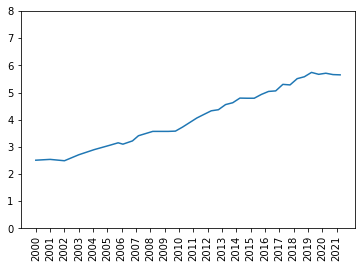

In [62]:
macIndex = np.array(data["dollar_price"]).tolist()
dateLabel = [ts.strftime('%Y') for ts in list(data.index)]
dateLabel = sorted(list(set(dateLabel)))

datePos = np.array([ float(ts.strftime('%Y')) + float(ts.strftime('%m')) / 12. for ts in list(data.index)])
datePos = datePos - np.min(datePos) + 1.

plt.xticks(np.arange(1, len(dateLabel)+1), dateLabel)
plt.xticks(rotation=90)
plt.ylim(0., 8.)
plt.plot(datePos.tolist(), macIndex)
plt.show()